# Library

In [7]:
import numpy as np
import pandas as pd
import random
from scipy.stats import norm
import matplotlib.pyplot as plt

In [8]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import statistic, visual
%reload_ext autoreload

# Load data

In [76]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/Modal_Antar.csv")

In [77]:
df

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1


In [7]:
 # Load dataset
df_time = pd.read_csv(f'E:\gitlab\machine-learning\dataset\RestaurantVisitors.csv',index_col='date',parse_dates=True)
df_time.index.freq = 'D'

In [8]:
 df_time = df_time.dropna()

In [9]:
df_time

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0


# Statistic test

## normality test

In [5]:
statistic.stat_test(df['usia'],types="normality")

Normality Tests

shapiro test

stat= 0.974, p= 0.011
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the sample does not have a Gaussian distribution


D'Agostino's K^2 Normality Test

stat= 5.970, p= 0.051
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the sample has a Gaussian distribution


Anderson-Darling Test

stat= 0.971
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level




,name,stat_value,p_value,result
0,shapiro test,0.973563,0.010727,H1: the sample does not have a Gaussian distri...
1,D'Agostino's K^2 Normality Test,5.969807,0.050544,H0: the sample has a Gaussian distribution
2,Anderson-Darling Test,0.971481,0.010000,Probably Gaussian at the 1.0% level


In [6]:
y = 2 * np.random.normal(loc=1,scale=2,size=1000) + 2

In [8]:
statistic.stat_test(y,types="normality")

Normality Tests

shapiro test

stat= 0.998, p= 0.289
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the sample has a Gaussian distribution


D'Agostino's K^2 Normality Test

stat= 0.074, p= 0.964
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the sample has a Gaussian distribution


Anderson-Darling Test

stat= 0.429
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level




,name,stat_value,p_value,result
0,shapiro test,0.998014,0.288699,H0: the sample has a Gaussian distribution
1,D'Agostino's K^2 Normality Test,0.074099,0.963628,H0: the sample has a Gaussian distribution
2,Anderson-Darling Test,0.428890,0.010000,Probably Gaussian at the 1.0% level


## correlation test

In [80]:
statistic.stat_test(df['usia'],df['kat_status'],types="correlation",sub_type='numeric')

Correlation Tests

Pearsonr Correlation test

stat= 0.032, p= 0.713
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the two samples are independent


Spearman's Rank Correlation Test

stat= 0.029, p= 0.737
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the two samples are independent


Kendall's Rank Correlation Test

stat= 0.029, p= 0.737
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the two samples are independent


,Coefficients Value,Effect strength
0,0,No relationship
1,0.10 - 0.29,Small relationship
2,0.30 - 0.49,Medium relationship
3,0.50 - 1.00,Strong relationship


,name,stat_value,p_value,result
0,Pearsonr Correlation test,0.032227,0.712688,H0: the two samples are independent
1,Spearman's Rank Correlation Test,0.029418,0.736765,H0: the two samples are independent
2,Kendall's Rank Correlation Test,0.029418,0.736765,H0: the two samples are independent


## Chi-square

In [9]:
expected = [120, 90, 40]
observed = [110, 95, 45]

In [10]:
statistic.stat_test(expected,observed,types="correlation",sub_type='chisquare')

Correlation Tests

Chi-Square Test of Independence

stat= 0.864, p= 0.649
Degrees of freedom= 2.000
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the two samples are independent




,name,stat_value,p_value,result
0,Chi-Square Test of Independence,0.864035,0.649198,H0: the two samples are independent


In [12]:
expected = [50, 50, 50, 50, 50]
observed = [50, 60, 40, 47, 53]

In [15]:
statistic.stat_test(expected,observed,types="correlation",sub_type='chisquare_gft')

Correlation Tests

Chi-Square Goodness of Fit Test

stat= 4.528, p= 0.339
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: A variable follows a hypothesized distribution.




,name,stat_value,p_value,result
0,Chi-Square Goodness of Fit Test,4.527967,0.339244,H0: A variable follows a hypothesized distribu...


## McNemar’s Test

In [24]:
# define contingency table
table = [[4, 2],
		 [1, 3]]

# 						Classifier2 Correct,	Classifier2 Incorrect
# Classifier1 Correct 	Yes/Yes					Yes/No
# Classifier1 Incorrect No/Yes 					No/No

In [25]:
statistic.stat_test(table,types="nemar")

McNemar’s Test

stat= 0.333, p= 0.564
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: The proportion of variables was same.




,name,stat_value,p_value,result
0,McNemar’s Test,0.333333,0.563703,H0: The proportion of variables was same.


## stationary

In [10]:
statistic.stat_test(df_time['total'],types="stationary")

Stationary Tests



2021-10-12 21:12:57,931 [11296] WARNING  py.warnings:110: [JupyterRequire] E:\programs\python\lib\site-packages\statsmodels\tsa\stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning



Augmented Dickey-Fuller Unit Root test

stat= -5.592, p= 0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: a unit root is not present (series is stationary)


Kwiatkowski-Phillips-Schmidt-Shin Test

stat= 0.202, p= 0.100
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the time series is not trend-stationary




,name,stat_value,p_value,result
0,Augmented Dickey-Fuller Unit Root test,-5.592497,0.000001,H1: a unit root is not present (series is stat...
1,Kwiatkowski-Phillips-Schmidt-Shin Test,0.202363,0.100000,H0: the time series is not trend-stationary


## p_hypothesis

In [26]:
statistic.stat_test(df['usia'],df['pendapatan'],types="p_hypothesis")

Parametric Statistical Hypothesis Tests

Student's t-test

stat=-16.404, p=0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the means of the samples are unequal


Paired Student's t-test

stat=-16.404, p=0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the means of the samples are unequal


Analysis of Variance Test (ANOVA)

stat=269.090, p=0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the means of the samples are unequal




,name,stat_value,p_value,result
0,Student's t-test,-16.403967,3.561431e-42,H1: the means of the samples are unequal
1,Paired Student's t-test,-16.403969,1.174441e-33,H1: the means of the samples are unequal
2,Analysis of Variance Test (ANOVA),269.090130,3.561431e-42,H1: the means of the samples are unequal


## nonp_hypothesis

In [6]:
statistic.stat_test(df['usia'],df['pendapatan'],types="nonp_hypothesis",sub_type='nonp_hypothesis')

Nonparametric Statistical Hypothesis Tests

Mann-Whitney U Test

stat= 0.000, p= 0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the distributions of both samples are not equal


Wilcoxon Signed-Rank Test

stat= 0.000, p= 0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the distributions of both samples are not equal


Kruskal-Wallis H Test

stat= 198.876, p= 0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the distributions of one or more samples are not equal




,name,stat_value,p_value,result
0,Mann-Whitney U Test,0.000000,3.715920e-45,H1: the distributions of both samples are not ...
1,Wilcoxon Signed-Rank Test,0.000000,1.429496e-23,H1: the distributions of both samples are not ...
2,Kruskal-Wallis H Test,198.875806,3.674172e-45,H1: the distributions of one or more samples a...


## kruskal

In [8]:
group1 = [7, 14, 14, 13, 12, 9, 6, 14, 12, 8]
group2 = [15, 17, 13, 15, 15, 13, 9, 12, 10, 8]
group3 = [6, 8, 8, 9, 5, 14, 13, 8, 10, 9]

In [9]:
statistic.stat_test(main_data_1=group1,main_data_2=group2,
                    main_data_3=group3,types="nonp_hypothesis",sub_type='kruskal')

Nonparametric Statistical Hypothesis Tests

3
Kruskal-Wallis H Test

stat= 6.288, p= 0.043
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the distributions of one or more samples are not equal




,name,stat_value,p_value,result
0,Kruskal-Wallis H Test,6.287802,0.043114,H1: the distributions of one or more samples a...


## friedman

Tests whether the distributions of two or more paired samples are equal or not

friedman is a non-parametric alternative to the Repeated Measures ANOVA.
It is used to determine whether or not there is a statistically significant difference between the means of three or more groups in which the same subjects show up in each group.

In [11]:
statistic.stat_test(main_data_1=group1,main_data_2=group2,
                    main_data_3=group3,types="nonp_hypothesis",sub_type='friedman')

Nonparametric Statistical Hypothesis Tests

3
Friedman Test

stat= 2.263, p= 0.323
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: The mean for each population is equal




,name,stat_value,p_value,result
0,Friedman Test,2.263158,0.322524,H0: The mean for each population is equal


## Cochran\'s Q test

In [27]:
cases = np.array([[0, 0, 0],
                  [1, 0, 0],
                  [1, 1, 0],
                  [1, 1, 1]])
                      
count = np.array([ 6,  16, 4,  2])
data = np.repeat(cases, count, 0)
data

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 1]])

In [32]:
statistic.stat_test(main_data_1=data,types="nonp_hypothesis",sub_type='cochran')

Nonparametric Statistical Hypothesis Tests

Cochran's Q test

stat= 33.600, p= 0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: The proportion of “successes” is different in at least one of the groups




,name,stat_value,p_value,result
0,Cochran's Q test,33.6,5.056531e-08,H1: The proportion of “successes” is different...


# AB testing

A/B testing is one of the most popular controlled experiments used to optimize web marketing strategies. It allows decision makers to choose the best design for a website by looking at the analytics results obtained with two possible alternatives A and B.

## Statistical significance

Our null hypothesis H0 is that the two designs A and B have the same efficacy

The statistical significance is then measured by the p-value, i.e. the probability of observing a discrepancy between our samples at least as strong as the one that we actually observed.

A two-tailed test is preferable in our case, since we have no reason to know a priori whether the discrepancy between the results of A and B will be in favor of A or B. This means that we consider the alternative hypothesis Ha the hypothesis that A and B have different efficacy.

The p-value is therefore computed as the area under the the two tails of the probability density function p(x) of a chosen test statistic on all x’ s.t. p(x’) <= p(our observation). The computation of such p-value clearly depends on the data distribution. So we will first see how to compute it for discrete metrics, and then for continuous metrics.

## Discrete

In [33]:
np.random.seed(42)

x = np.random.binomial(n=1, p=0.6, size=15)
y = np.random.binomial(n=1, p=0.4, size=19)

_, (a, c) = np.unique(x, return_counts=True)
_, (b, d) = np.unique(y, return_counts=True)

df = pd.DataFrame(data=[[a, b], [c, d]], 
                 index=["click", "no click"], 
                 columns=["A", "B"])
m = df.values

print("- Observations:")
print(f"  - Version A: = {x}")
print(f"  - Version B: = {y}")
print("")
print("- Contingency table:")
display(df)

- Observations:
  - Version A: = [1 0 0 1 1 1 1 0 0 0 1 0 0 1 1]
  - Version B: = [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1]

- Contingency table:


,A,B
click,7,15
no click,8,4


Contingency table


,data_1,data_2
click,7,15
no click,8,4


Fisher's exact test
- Fisher's exact test: p-val = 7.5%
Strong evidence against the null hypothesis
Reject the null hypothesis
H0: the two models have the same efficacy


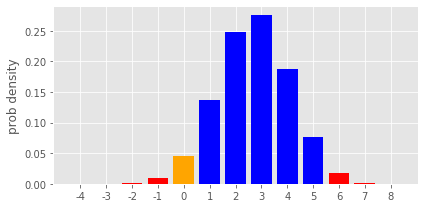

Pearson's chi-squared test
- Pearson's chi-squared t-test:
   - χ2 value: 3.825
   - p-value: 5.1%
Strong evidence against the null hypothesis
Reject the null hypothesis
H0: the two models have the same efficacy
McNemar’s Test

stat= 0.000, p= 0.016
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: Significant difference in the disagreement (e.g. treatment had an effect)


,name,stat_value,p_value,result
0,Fisher's exact test,4.000000,0.075162,H0: the two models have the same efficacy
1,Pearson's chi-squared test,3.824774,0.050500,H0: the two models have the same efficacy
2,McNemar’s Test,0.000000,0.015625,H1: Significant difference in the disagreement...


In [34]:
statistic.stat_test(x,y,types="ab_test",labels=["click", "no click"],sub_type='discrete')

## continum

In [24]:
np.random.seed(42)

n_x, n_y = 17, 14

d1 = norm(loc=200, scale=100)
d2 = norm(loc=280, scale=90)

disc = 50
x = (d1.rvs(size=n_x) / disc).astype(int) * disc
y = (d2.rvs(size=n_y) / disc).astype(int) * disc

- Distribution plot:


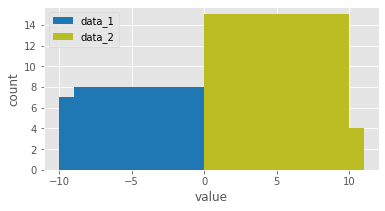

Z-test:
   - z value: 2.028
   - p-value: 195.7%
Strong evidence against the null hypothesis
Reject the null hypothesis
H0: two models have the same efficacy


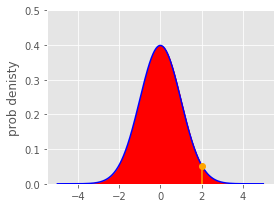

Student's t-test:
   - nu: 32.000
   - t value: 2.014
   - p-value: 194.8%
Strong evidence against the null hypothesis
Reject the null hypothesis
H0: two models have the same efficacy


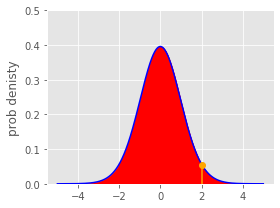

Welch' t-test:
   - nu: 26.714
   - t value: 1.964
   - p-value: 194.0%
Strong evidence against the null hypothesis
Reject the null hypothesis
H0: two models have the same efficacy


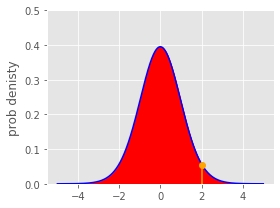

Mann-Whitney U test:
   - U value: 188.500
   - p-value: 5.4%
Strong evidence against the null hypothesis
Reject the null hypothesis
H0: two models have the same efficacy


,name,stat_value,p_value,result
0,Z test,2.027859,1.957425,H0: two models have the same efficacy
1,Student's t-test,2.013968,1.947515,H0: two models have the same efficacy
2,Welch' t-test,1.964127,1.940001,H0: two models have the same efficacy
3,Mann-Whitney U test,188.500000,0.054014,H0: two models have the same efficacy


In [23]:
statistic.stat_test(x,y,types="ab_test",labels=["click", "no click"],sub_type='continuous')

## matrix_bayes

In [36]:
control = [16500, 30]
test = [17000, 50]

In [37]:
res = pd.DataFrame([control,test]).T
res.columns = ['control','test']

In [38]:
res

,control,test
0,16500,17000
1,30,50


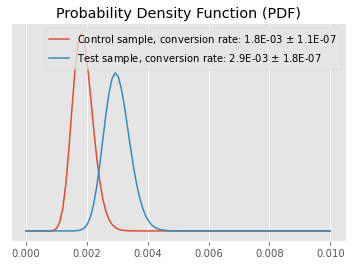

Test option lift matix by 59.68% with 98.2% probability.
the area is 0.98, 
which means that the Test option performs better than the Test one with 98.21% probability.


In [9]:
statistic.stat_test(res['control'],res['test'],types='ab_test',type_ab='matrix_bayes')

## delta

In [13]:
from random import randint

#dummy variables
click_control = [randint(0,20) for i in range(10000)]
view_control = [randint(1,60) for i in range(10000)]

click_treatment = [randint(0,21) for i in range(10000)]
view_treatment = [randint(1,60) for i in range(10000)]

control = pd.DataFrame({'click':click_control,'view':view_control})
treatment = pd.DataFrame({'click':click_treatment,'view':view_treatment})

In [19]:
statistic.stat_test(main_data_1=control,main_data_2=treatment,types='ab_test',
          sub_type='delta',labels=["click","view"])

Delta Method in A/B Tests Analysis

difference= 0.025, p= 0.000 

Strong evidence against the null hypothesis
Reject the null hypothesis
H0: two models have the same efficacy


,mean_control,mean_experiment,var_control,var_experiment,difference,lower_bound,upper_bound,p-value
0,0.324637,0.349502,0.000007,0.000008,0.024866,0.017125,0.032606,3.052540e-10


## ABCD - AB-test-analyzer

https://github.com/pararawendy/AB-test-analyzer

First, it will perform a Chi-square test on the aggregate data level. If this test is significant, the function will continue to perform a posthoc test that consists of testing each pair of experimental groups to report their adjusted p-values, as well as their absolute lift (difference) confidence intervals. Moreover, the class also has a method to calculate the statistical power of the experiment.

targeted -> visit

redeemed -> transaction

In [46]:
experiment_df = pd.DataFrame(
    data = [
            ['control',8333,1062,'user'],
            ['variant1',8002,825,'user'],
            ['variant2',8251,1289,'user'],
            ['variant3',8275,1228,'user']
    ],
    columns = ['experiment_group','targeted','redeemed','metric_level']
)

experiment_df

,experiment_group,targeted,redeemed,metric_level
0,control,8333,1062,user
1,variant1,8002,825,user
2,variant2,8251,1289,user
3,variant3,8275,1228,user


In [69]:
df,report_df = statistic.stat_test(main_data_1=experiment_df,types='ab_test',
          sub_type='abcd',metric_level='a',practical_lift=0.01)

The experiment's statistical power is 0.2681


In [70]:
df

,experiment_group,targeted,redeemed,metric_level,conversion
0,control,8333,1062,user,0.127445
1,variant1,8002,825,user,0.103099
2,variant2,8251,1289,user,0.156223
3,variant3,8275,1228,user,0.148399


In [71]:
report_df

,metric_level,pair,raw_p_value,adj_p_value (*=significant),mean_ci,lower_ci,upper_ci
0,a,control vs variant1,1.137315e-06,1.592240591875927e-06*,-0.024346,-0.034152,-0.014540
1,a,control vs variant2,1.081921e-07,1.8933619380632198e-07*,0.028778,0.018161,0.039396
2,a,control vs variant3,9.002234e-05,0.00010502606726165857*,0.020954,0.010466,0.031441
3,a,variant1 vs variant2,7.820956e-24,2.737334684573585e-23*,0.053124,0.042780,0.063468
4,a,variant1 vs variant3,3.237856e-18,7.554997289146693e-18*,0.045300,0.035098,0.055502
5,a,variant2 vs variant1,7.820956e-24,2.737334684573585e-23*,-0.053124,-0.063468,-0.042780
6,a,variant2 vs variant3,1.615949e-01,0.16159493454321772,NaN,NaN,NaN


# ANOVA

## One way

is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups.

In [6]:
group1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
group2 = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]

In [10]:
statistic.stat_test(main_data_1=group1,main_data_2=group2,types='anova',
                    sub_type="one_way",labels=None,formula=None)

ANOVA One Way F-test

stat= 3.692, p= 0.071
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: two or more population means are equal




,name,stat_value,p_value,result
0,one-way ANOVA,3.69228,0.070643,H0: two or more population means are equal


In [23]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/PlantGrowth.csv")

In [43]:
grps = pd.unique(df['group'].values)
d_data = {grp:df['weight'][df.group == grp] for grp in grps}

In [45]:
statistic.stat_test(main_data_1=d_data['ctrl'],main_data_2=d_data['trt1'],types='anova',
                    sub_type="one_way",labels=None,formula=None)

ANOVA One Way F-test

stat= 1.419, p= 0.249
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: two or more population means are equal




,name,stat_value,p_value,result
0,one-way ANOVA,1.419101,0.249023,H0: two or more population means are equal


## welch

In [26]:
df = pd.DataFrame({'score': [64, 66, 68, 75, 78, 94, 98, 79, 71, 80,
                             91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
                             79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
                   'group': np.repeat(['a', 'b', 'c'], repeats=10)}) 

In [29]:
statistic.stat_test(main_data_1=df,main_data_2=['group','score'],types='anova',
                    sub_type="welch")

Welch`s ANOVA test

stat= 9.717, p= 0.002
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: two or more population means are not equal




,name,stat_value,p_value,result
0,Welch ANOVA test,9.717185,0.001598,H1: at least one population means are not equal


## Two way

In [95]:
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

In [96]:
formula = 'height ~ C(water) + C(sun) + C(water):C(sun)'

In [100]:
statistic.stat_test(main_data_1=df,types='anova',
                    sub_type="two_way",labels=None,formula=formula)

Overall model F( 5, 24) =  13.450, p =  0.0000


,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


## repeated

In [49]:
df = pd.DataFrame({'patient': np.repeat([1, 2, 3, 4, 5], 4),
                   'drug': np.tile([1, 2, 3, 4], 5),
                   'response': [30, 28, 16, 34, 14, 18, 10, 22, 24, 20, 18, 30,
                                38, 34, 20, 44, 26, 28, 14, 30]})

In [94]:
statistic.stat_test(main_data_1=df,types='anova',
                    sub_type="repeated",labels=None,
                    formula=['response','patient','drug'])

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: µ1 = µ2 = µ3 (the population means are all equal)


,F Value,Num DF,Den DF,Pr > F
drug,24.758865,3.0,12.0,0.00002


## Tukey’s Test

In [9]:
df = pd.DataFrame({'score': [85, 86, 88, 75, 78, 94, 98, 79, 71, 80,
                             91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
                             79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
                   'group': np.repeat(['a', 'b', 'c'], repeats=10)}) 

Tukey’s Test



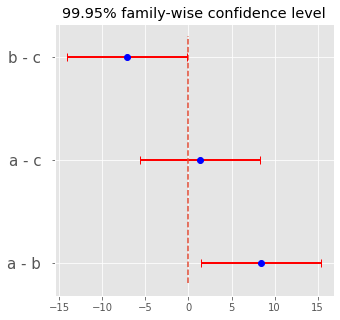

,group1,group2,type,meandiff,p-adj,lower,upper,reject,result
1,a,b,a - b,8.4,0.0158,1.4272,15.3728,True,"Strong evidence against the null hypothesis, p..."
2,a,c,a - c,1.3,0.8864,-5.6728,8.2728,False,"Weak evidence against the null hypothesis, pop..."
3,b,c,b - c,-7.1,0.0453,-14.0728,-0.1272,True,"Strong evidence against the null hypothesis, p..."


In [10]:
statistic.stat_test(main_data_1=df['score'],main_data_2=df['group'],types='post_hoc', sub_type="tukey")

## Games-Howell Test

In [11]:
statistic.stat_test(main_data_1=df,main_data_2=['group','score'],types='post_hoc',
                    sub_type="games_howell")

Games-Howell Test



,A,B,mean(A),mean(B),diff,se,T,df,pval,explain,hedges
0,a,b,83.4,91.8,-8.4,3.011091,-2.789687,13.590515,0.036887,H1: two samples means are not equal,-1.194871
1,a,c,83.4,84.7,-1.3,3.149074,-0.412820,15.135132,0.900000,H0: two samples means are equal,-0.176818
2,b,c,91.8,84.7,7.1,2.179959,3.256942,17.441992,0.011913,H1: two samples means are not equal,1.395004


## Dunn test

In [12]:
a = df[df["group"]=='a']['score']
b = df[df["group"]=='b']['score']
c = df[df["group"]=='c']['score']
dff = [a,b,c]

 Dunn’s test



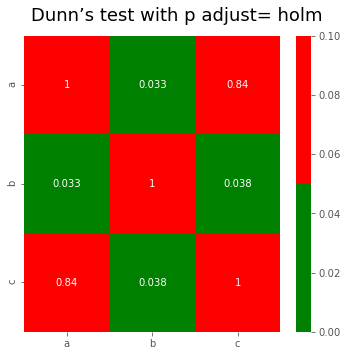

,a,b,c
a,1.000000,0.032827,0.838695
b,0.032827,1.000000,0.038467
c,0.838695,0.038467,1.000000


In [13]:
statistic.stat_test(main_data_1=dff,types='post_hoc', sub_type="dunn",
                    labels=["a","b","c"],p_adjust='holm')

## Nemenyi

perform the Nemenyi post-hoc test to determine exactly which groups have different means.

A one-way ANOVA with repeated measures that is also referred to as ANOVA with unreplicated block design can also be conducted via Friedman’s test. The consequent post hoc pairwise multiple comparison test according to Nemenyi is conducted with this function.

In [23]:
group1 = [4, 6, 3, 4, 3, 2, 2, 7, 6, 5]
group2 = [5, 6, 8, 7, 7, 8, 4, 6, 4, 5]
group3 = [2, 2, 5, 3, 2, 2, 1, 4, 3, 2]
data = np.array([group1, group2, group3]).T

 Nemenyi’s test



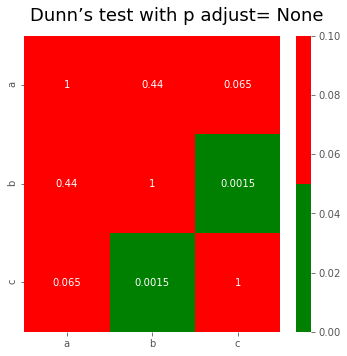

,a,b,c
a,1.000000,0.437407,0.065303
b,0.437407,1.000000,0.001533
c,0.065303,0.001533,1.000000


In [26]:
statistic.stat_test(main_data_1=data,types='post_hoc', sub_type="nemenyi",
                    labels=["a","b","c"])

## strength measurement

### Cramer’s V

Cramer’s V is a measure of the strength of association between two nominal variables.


It ranges from 0 to 1 where:

0 indicates no association between the two variables.

1 indicates a strong association between the two variables.

In [62]:
statistic.stat_test(res.T,types="strength",sub_type='cramer')

Cramer’s V
Cramer’s V = 0.011461581273892702
Cramer's V Degrees of Freedom = 1

notes 
where: 
0 indicates no association between the two variables.
1 indicates a strong association between the two variables.
                


,name,stat_value,p_value,result


In [55]:
data = np.array([[6,9], [8, 5], [12, 9]])

In [56]:
statistic.stat_test(pd.DataFrame(data),types="strength",sub_type='cramer')

Cramer’s V
Cramer’s V = 0.17745303788174568
Cramer's V Degrees of Freedom = 1

notes 
where: 
0 indicates no association between the two variables.
1 indicates a strong association between the two variables.
                


,name,stat_value,p_value,result


In [57]:
GE = pd.DataFrame({'Blue' :[370, 359],
                   'Brown':[352, 290],
                   'Green':[198, 110],
                   'Hazel':[187, 169]},index={'Female','Male'})
GE

,Blue,Brown,Green,Hazel
Female,370,352,198,187
Male,359,290,110,169


In [59]:
statistic.stat_test(GE,types="strength",sub_type='cramer')

Cramer’s V
Cramer’s V = 0.09028995985889104
Cramer's V Degrees of Freedom = 1

notes 
where: 
0 indicates no association between the two variables.
1 indicates a strong association between the two variables.
                


,name,stat_value,p_value,result


### Phi Coefficient

In [60]:
# Phi coefficient; two by by contigency table
GEsubset = GE.drop(columns=['Blue', 'Hazel'])
GEsubset

,Brown,Green
Female,352,198
Male,290,110


In [61]:
statistic.stat_test(GE,types="strength",sub_type='phi_coef')

Phi Coefficient
Phi Coefficient = 0.09028995985889104
Phi Coefficient Degrees of Freedom = 1

notes
where:
-1 indicates a perfectly negative relationship between the two variables.
0 indicates no association between the two variables.
1 indicates a perfectly positive relationship between the two variables.
                


,name,stat_value,p_value,result


### Point-biserial correlation

In [63]:
x = [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]
y = [12, 14, 17, 17, 11, 22, 23, 11, 19, 8, 12]

In [66]:
statistic.stat_test(x,y,types="strength",sub_type='pb_corr')

Point-biserial correlation
Point-biserial correlation

correlation= 0.218, p= 0.519
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the two samples are independent




,name,stat_value,p_value,result
0,Point-biserial correlation,0.218163,0.519284,H0: the two samples are independent


In [70]:
# initialize random number generator
random.seed(36)
# Assume y is studied (1)/ not studied (0) 
# X is the test score, max 20 marks
y = [random.randint(0, 1) for num in range(0, 10)]
print(f'y values: {y}')
X = []
for i in y:
    if i != 0:
        ele = random.randint(11, 20)        
    else:
        ele = random.randint(1, 10) # 1-10 not studied
    X.append(ele)
print(f'X values: {X}')

y values: [1, 0, 0, 1, 0, 0, 0, 0, 1, 1]
X values: [16, 9, 5, 19, 2, 10, 7, 8, 17, 16]


In [71]:
statistic.stat_test(X,y,types="strength",sub_type='pb_corr')

Point-biserial correlation
Point-biserial correlation

correlation= 0.914, p= 0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: there is a dependency between the samples




,name,stat_value,p_value,result
0,Point-biserial correlation,0.914069,0.000215,H1: there is a dependency between the samples


## ANCOVA

In [13]:
df = pd.DataFrame({'technique': np.repeat(['A', 'B', 'C'], 5),
                   'current_grade': [67, 88, 75, 77, 85,
                                     92, 69, 77, 74, 88, 
                                     96, 91, 88, 82, 80],
                   'exam_score': [77, 89, 72, 74, 69,
                                  78, 88, 93, 94, 90,
                                  85, 81, 83, 88, 79]})

In [17]:
statistic.stat_test(df,df.columns,types='anova', sub_type='ancova')

ANCOVA test

stat= 4.810, p= 0.032
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: two or more population means are not equal




,Source,SS,DF,F,p-unc,np2
0,technique,390.575130,2,4.809973,0.031556,0.466536
1,current_grade,4.193886,1,0.103296,0.753934,0.009303
2,Residual,446.606114,11,NaN,NaN,NaN


## Variance

In [18]:
A = [64, 66, 68, 75, 78, 94, 98, 79, 71, 80]
B = [91, 92, 93, 90, 97, 94, 82, 88, 95, 96]
C = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

In [22]:
statistic.stat_test(A,B,C,types='variance',sub_type='bartlett',formula='mean')

Levene's test

stat= 4.958, p= 0.039
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: The variances among the populations are not equal.
H1: do have sufficient evidence to say that the variance between the two datasets is significantly different


F test

stat= 6.572, p= 0.005
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: The variances among the populations are not equal.
H1: do have sufficient evidence to say that the variance between the two datasets is significantly different


3
Bartlett test

stat= 9.040, p= 0.011
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: At least one group has a variance that is not equal to the rest.
H1: do have sufficient evidence to say that the variance between the two datasets or more is significantly different




,name,stat_value,p_value,result
0,Levene's test,4.958114,0.038975,H1: The variances among the populations are no...
1,F test,6.572323,0.004916,H1: The variances among the populations are no...
2,Bartlett test,9.039674,0.010891,H1: At least one group has a variance that is ...


# Benford’s Law

Violation: Digit 0 in 2 place
Violation: Digit 1 in 1 place
Violation: Digit 2 in 2 place
Violation: Digit 5 in 1 place
Total violations: 42


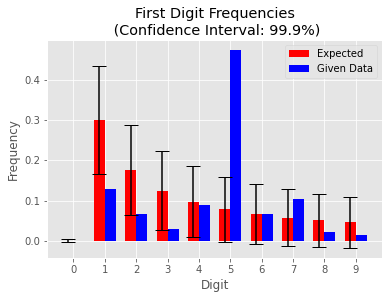

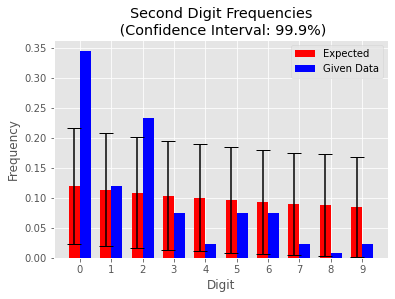

In [18]:
res, val = statistic.benford_law(df,'pendapatan',10,2,.999)

In [19]:
res

,digit,expected prob_first,observed prob_first,expected prob_second,observed prob_second
0,0,0.000,0.000000,0.120,0.345865
1,1,0.301,0.127820,0.114,0.120301
2,2,0.176,0.067669,0.109,0.233083
3,3,0.125,0.030075,0.104,0.075188
4,4,0.097,0.090226,0.100,0.022556
5,5,0.079,0.473684,0.097,0.075188
6,6,0.067,0.067669,0.093,0.075188
7,7,0.058,0.105263,0.090,0.022556
8,8,0.051,0.022556,0.088,0.007519
9,9,0.046,0.015038,0.085,0.022556


In [20]:
val

,cleaned,first_digit,second_digit
0,10046300,1,0
1,10290000,1,0
5,6000000,6,0
10,10120000,1,0
11,7000000,7,0
12,10000000,1,0
18,10804000,1,0
23,10850000,1,0
26,3000000,3,0
30,10100000,1,0


# Partial Correlation

In [3]:
data = {'currentGrade':  [82, 88, 75, 74, 93, 97, 83, 90, 90, 80],
        'hours': [4, 3, 6, 5, 4, 5, 8, 7, 4, 6],
        'examScore': [88, 85, 76, 70, 92, 94, 89, 85, 90, 93],
        }

df = pd.DataFrame(data, columns = ['currentGrade','hours', 'examScore'])
df

,currentGrade,hours,examScore
0,82,4,88
1,88,3,85
2,75,6,76
3,74,5,70
4,93,4,92
5,97,5,94
6,83,8,89
7,90,7,85
8,90,4,90
9,80,6,93


In [4]:
statistic.partial_corr(df,["hours","examScore"],'currentGrade')

,n,r,CI95%,p-val
pearson,10,0.190626,"[-0.54, 0.76]",0.623228


# Gain Lift

In [119]:
#create data
data = np.array([56, 58, 64, 67, 68, 73, 78, 83, 84, 88,
                 89, 90, 91, 92, 93, 93, 94, 95, 97, 99])

#calculate deciles of data
deciles = [10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0]
datas = np.round(np.percentile(data, np.arange(0, 100, 10)),0)
costs = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
df2 = pd.DataFrame({'deciles': deciles, 'costs': costs})

df2["respons"] = np.array(datas) * 0.15
df2["returns"] =  np.array(df2["respons"])*5000
df2["profits"] = df2["returns"] - df2["costs"]

In [120]:
df2

,deciles,costs,respons,returns,profits
0,10.0,1000,8.40,42000.0,41000.0
1,20.0,2000,9.45,47250.0,45250.0
2,30.0,3000,10.20,51000.0,48000.0
3,40.0,4000,11.40,57000.0,53000.0
4,50.0,5000,12.60,63000.0,58000.0
5,60.0,6000,13.20,66000.0,60000.0
6,70.0,7000,13.50,67500.0,60500.0
7,80.0,8000,13.80,69000.0,61000.0
8,90.0,9000,13.95,69750.0,60750.0
9,100.0,10000,14.25,71250.0,61250.0


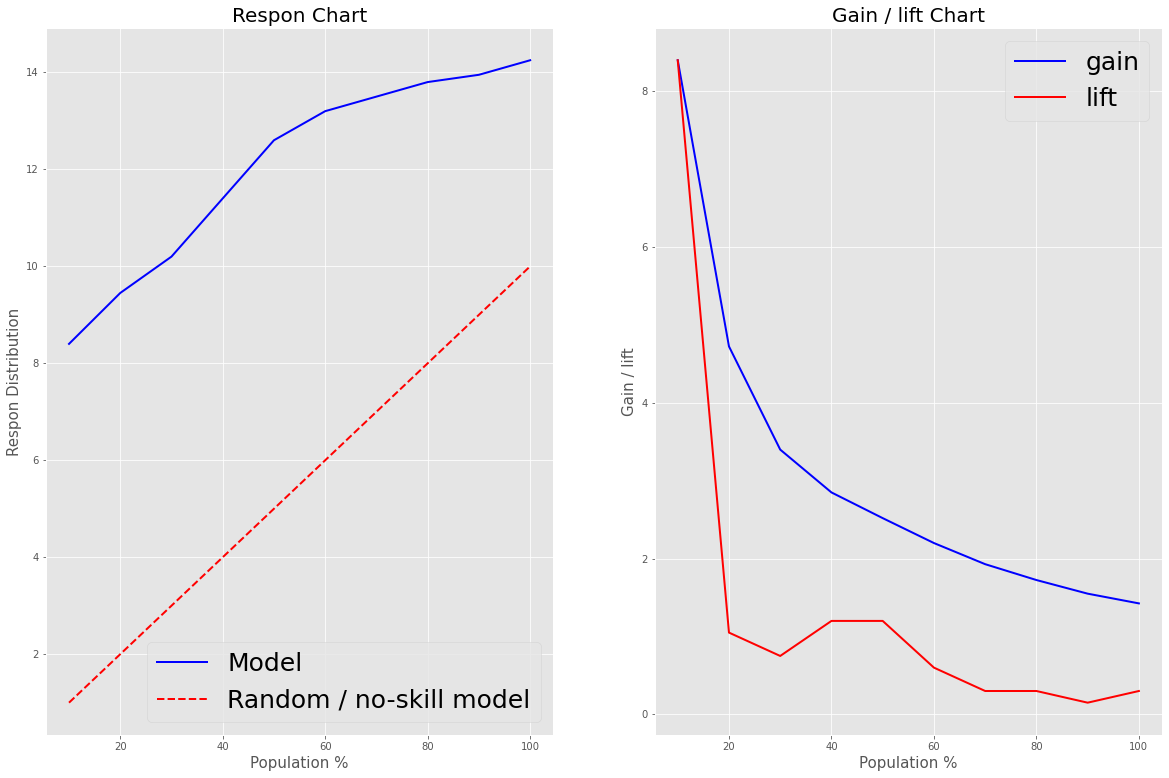

In [127]:
result = statistic.gain_lift(df2)

# Measuring Uncertainty with the Bootstrap

In [32]:
### Generating the data

times = [2,2,3,5,6,9,10,47,61,413]
experience = [11,17,18,1,10,4,6,3,8,0]

data_df = pd.DataFrame({'times': times, 'experience': experience})

95%-CI Lower limit =  -23.04
95%-CI Upper limit =  134.64


Bootstrap Lower limit =  7.3
Bootstrap Upper limit =  137.2


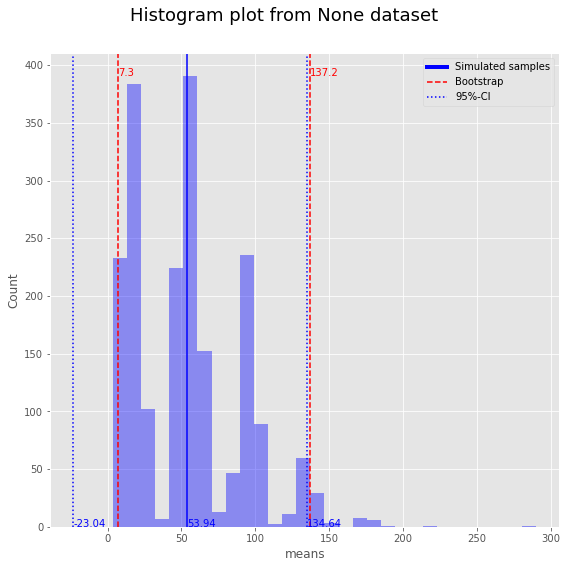

In [44]:
statistic.bootstrap(data_df,['times','experience'],methods='mean')

Bootstrap Lower limit =  0.0
Bootstrap Upper limit =  0.3


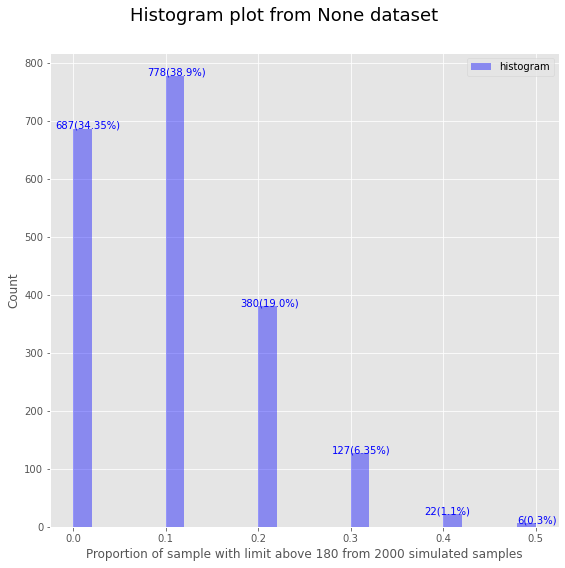

In [34]:
statistic.bootstrap(data_df,['times','experience'],bins=25,methods='adhoc')

                            OLS Regression Results                            
Dep. Variable:                  times   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     2.427
Date:                Sat, 13 Nov 2021   Prob (F-statistic):              0.158
Time:                        10:12:46   Log-Likelihood:                -60.795
No. Observations:                  10   AIC:                             125.6
Df Residuals:                       8   BIC:                             126.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.3891     61.750      2.144      0.0

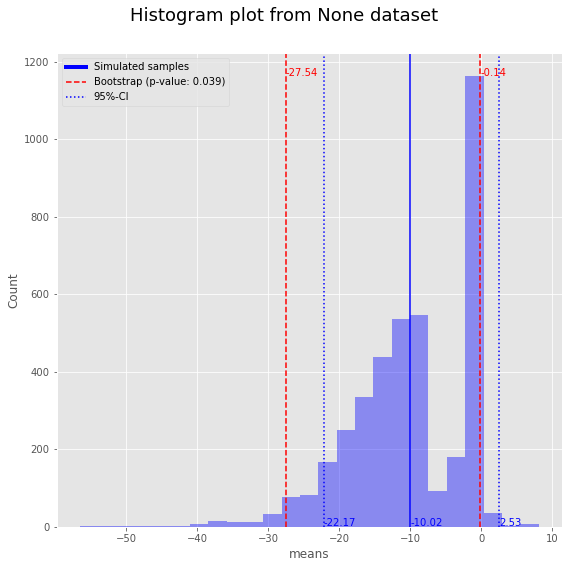

In [47]:
statistic.bootstrap(data_df,['times','experience'],n_b=4000,bins=25,methods='regression')

# survive analysis

Survival analysis is a set of statistical approaches used to determine the time it takes for an event of interest to occur.

We use survival analysis to study the time until some event of interest occurs.

    1. Kaplan-Meier plots to visualize survival curves.
    2. Nelson-Aalen plots to visualize the cumulative hazard.
    3. Log-Rank test to compare the survival curves of two or more groups
    4. Cox-proportional hazards regression finds out the effect of different variables like age, sex, and weight on survival.

Censoring
The event of interest can be anything like birth, death, or retirement.
However, there is still a possibility that the event we are interested in does not occur. Such observations are known as censored observations.

There are three types of censoring:
 
    Right censoring     = The subject under observation is still alive.
                          In this case, we can not have our timing when our event of interest(death) occurs.
    Left Censoring      = In this type of censoring, the event cannot be observed for some reason.
                          It may also include the event that occurred before the experiment started,
                          such as the number of days from birth when the kid started walking.
    Interval Censoring  = In this type of data censoring, we only have data for a specific interval,
                          so it is possible that the event of interest does not occur during that time.

Assumptions for censored data.There are three assumptions about censoring : 

    - independent censoring
    for having correct conjectures in order to compare the survival experience of two or more groups (e.g. treatment vs. placebo). 
    
    - random censoring
     More stronger assumption and restrictive is randomness that denotes that failure time in censored data assumed to be equal to failure time of non censored.
     
    - non-informative censoring.
    Non-informative censoring takes place if the distribution of survival times (T) extracts no information about the distribution of censorship times and vice versa. The non-informative is reasonable when censored are independent or random however the tree asumptions are not equivalent.

Censoring may occur in the following instances:
    
- A patient has not (yet) experienced the event of interest (death or relapse in our case) within a period.
- A patient is not followed anymore.
- If a patient moves to another city, then follow-up might not be possible for the hospital staff.
- We only have the data for a specific interval.

### Survival Function(S)

To find the survival probability of a subject, we will use the survival function S(t), the Kaplan-Meier Estimator. 

The survival function is defined as the probability that an individual (subject) survives from the time origin (diagnosis of a disease) to a specified future time t. 

In many deadly diseases, the survival probability decreases as the period increases. If the subject is alive at the end of an experiment, then that data will be censored.  
  
The survival probability at time t is equal to the product of the percentage chance of surviving at time t and each prior time.

the survival function, stating the probability of the event of interest (for example, the death event) not occurring by a certain time t.
 
### Hazard Function (H)

The hazard probability, denoted by H(t), is the probability that an individual (subject) who is under observation at a time t has an event (death) at that time.

the hazard function, which can be interpreted as the probability of the subject experiencing the event of interest within a small interval of time, assuming that the subject has survived up until the beginning of the said interval.

assumtions:

- The event of interest is unambiguous and happens at a clearly specified time.
- The survival probability of all observations is the same, it does not matter exactly when they have entered the study.
- Censored observations have the same survival prospects as observations that continue to be followed.

it is used to estimate the cumulative number of expected events within a certain period of time. And the reason why it is cumulative is that the sum of estimates is much more stable than the point-wise estimates.


Generally the Survival function focus on surviving when hazard function focus on failing. The hazard function has as target the failure whereas survival function focus on the opposite result.


### Kaplan-Meier Estimator Theory

The Kaplan–Meier estimator is a non-parametric statistic used to estimate the survival function (probability of a person surviving) from the lifetime data.
 
Each drop in the survival function (approximated by the Kaplan-Meier estimator) is caused by the event of interest happening for at least one observation.

#### Common mistakes with Kaplan-Meier
- Removing censored data

It might be tempting to remove censored data as it can significantly alter the shape of the Kaplan-Meier curve, however, this can lead to severe biases so we should always include it while fitting the model.

- Interpreting the ends of the curves

Pay special attention when interpreting the end of the survival curves, as any big drops close to the end of the study can be explained by only a few observations reaching this point of time (this should also be indicated by wider confidence intervals)

- Dichotomizing continuous variables

By dichotomizing I mean using the median or “optimal” cut-off point to create groups such as “low” and “high” regarding any continuous metric. This approach can create multiple problems:

    - Finding an “optimal“ cut-off point can be very dataset-dependent and impossible to replicate in different studies. Also, by doing multiple comparisons, we risk increasing the chances of false positives (finding a difference in the survival functions, when actually there is none).
    
    - Dichotomizing decreases the power of the statistical test by forcing all measurements to a binary value, which in turn can lead to the need for a much larger sample size required to detect an effect. It is also worth mentioning that with survival analysis, the required sample size refers to the number of observations with the event of interest.
    
    - When dichotomizing, we make poor assumptions about the distribution of risk among observations. Let’s assume we use the age of 50 as the split between young and old patients. If we do so, we assume that an 18-year-old is in the same risk group as a 49-year-old, which is not true in most of the cases.

    - Accounting for only one predictor

    The Kaplan-Meier estimator is a univariable method, as it approximates the survival function using at most one variable/predictor. As a result, the results can be easily biased — either exaggerating or missing the signal. That is caused by the so-called omitted-variable bias, which causes the analysis to assume that the potential effects of multiple predictors should be attributed only to the single one, which we take into account. Because of that, multivariable methods such as the Cox regression should be used instead.

### Estimating hazard rates using Nelson-Aalen

visualize the aggregate information on survival using the Nelson-Aalen hazard function h(t). 
The hazard function h(t) gives us the probability that a subject under observation at time t has an event of interest (death) at that time.

In [5]:
data = pd.read_csv(r"E:\gitlab\machine-learning\dataset\lung.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [6]:
#Organize our data:

#If status = 1 , then dead = 0
#If status = 2 , then dead = 1

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1

data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0



        Notes:
        - Event_at  = It stores the value of the timeline for our dataset.
        - Removed   = Observed + Censored
                      It stores the values of units that are no longer part of our experiment.
        - Censored  = Person that didn't pass the event.(They are of no use to us!)
                      Our ultimate goal is to find the survival probability for a person / unit.
                      At the end of the experiment, if the person is still not experience with the event,
                      we will add him/her to the censored category.
        - Observed  = Persons that pass the event.
                      It stores the value of the number of subjects that pass the event during the
                      experiment.
        - at_risk   = It stores the number of current patients under observation
                      In the beginning, it will be the total number of patients we are going to observe
                      in our experiment.
       

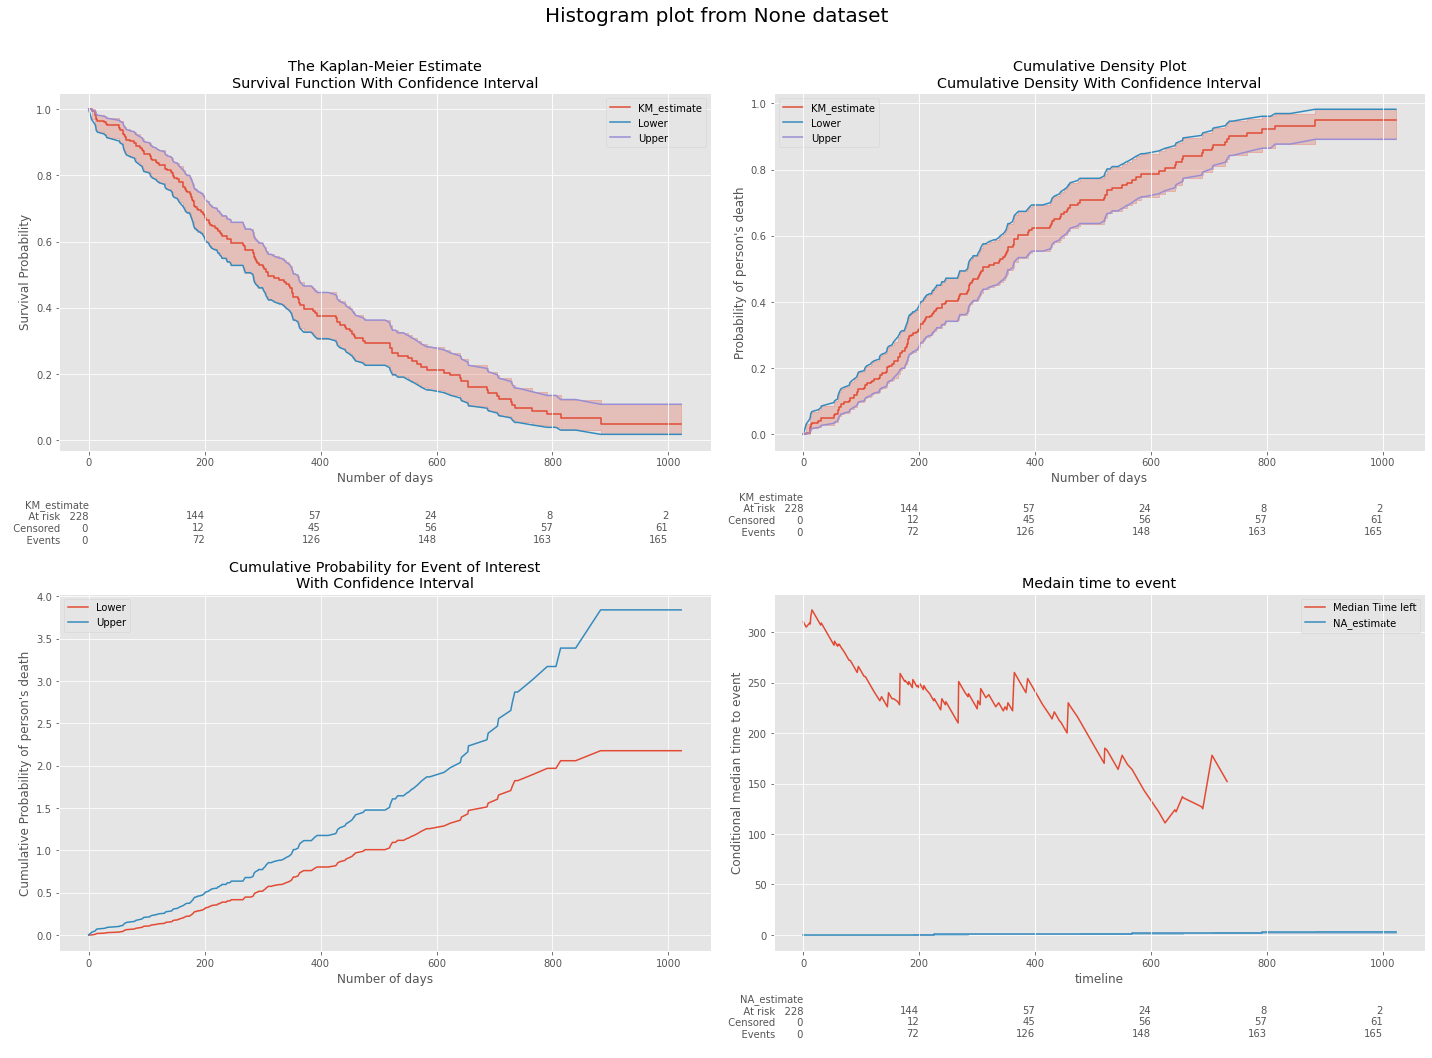

In [46]:
kmf,event_table,detail_table = statistic.survival_analysis(data,'time','dead')

In [13]:
event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [63]:
event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [64]:
detail_table

,KM_estimate_survival,KM_estimate_survival_lower_0.95,KM_estimate_survival_upper_0.95,KM_estimate_death,KM_estimate_death_lower_0.95,KM_estimate_death_upper_0.95,KM_estimate - Conditional median duration remaining to event,cumulative hazard probability,cumulative hazard probability_lower_0.95,cumulative hazard probability_upper_0.95
0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,310.0,0.000000,0.000000,0.000000
5.0,0.995614,0.969277,0.999381,0.004386,0.030723,0.000619,305.0,0.004386,0.000618,0.031136
11.0,0.982456,0.953935,0.993379,0.017544,0.046065,0.006621,309.0,0.017660,0.006628,0.047055
12.0,0.978070,0.948120,0.990813,0.021930,0.051880,0.009187,308.0,0.022125,0.009209,0.053156
13.0,0.969298,0.936682,0.985244,0.030702,0.063318,0.014756,316.0,0.031114,0.014832,0.065266
...,...,...,...,...,...,...,...,...,...,...
840.0,0.067127,0.030728,0.123060,0.932873,0.969272,0.876940,inf,2.641565,2.058738,3.389389
883.0,0.050346,0.017866,0.108662,0.949654,0.982134,0.891338,inf,2.891565,2.176987,3.840697
965.0,0.050346,0.017866,0.108662,0.949654,0.982134,0.891338,inf,2.891565,2.176987,3.840697
1010.0,0.050346,0.017866,0.108662,0.949654,0.982134,0.891338,inf,2.891565,2.176987,3.840697


# survive analysis group by

The log-rank test is a hypothesis test that is used to compare the survival distribution of two samples.


Goal: Our goal is to see if there is any significant difference between the groups being compared.


Null Hypothesis: The null hypothesis states that there is no significant difference between the groups being studied. If there is a significant difference between those groups, then we have to reject our null hypothesis.`

The median survival time 1:  270.0
The median survival time 2:  426.0


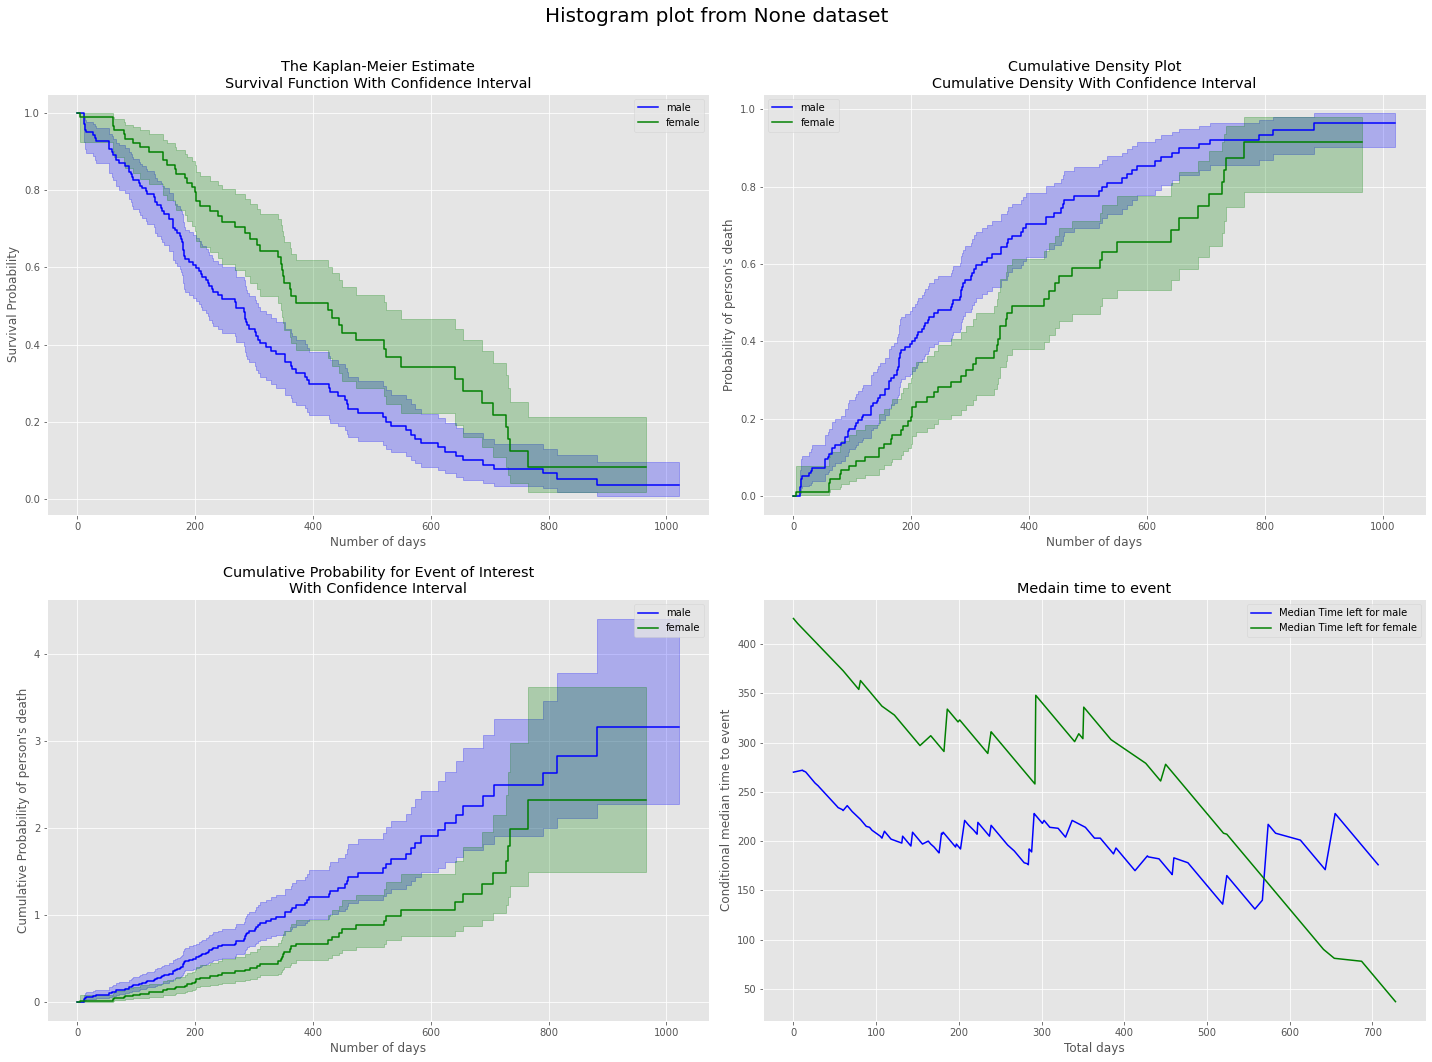

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

stat= 10.327, 
P-value= 0.001
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: there is difference between the groups being studied




In [45]:
form,data_list = statistic.survival_analysis_bygroups(data,'time','dead','sex',['male','female'],title=None,footnote=None)

# survive analysis group by

In [38]:
df = pd.read_csv(r'E:\gitlab\machine-learning\dataset\telco_customer_churn.csv')
df['churn'] = [1 if x == 'Yes' else 0 for x in df['Churn']]

The median survival time Electronic check:  47.0
The median survival time Mailed check:  inf
The median survival time Bank transfer (automatic):  inf
The median survival time Credit card (automatic):  inf


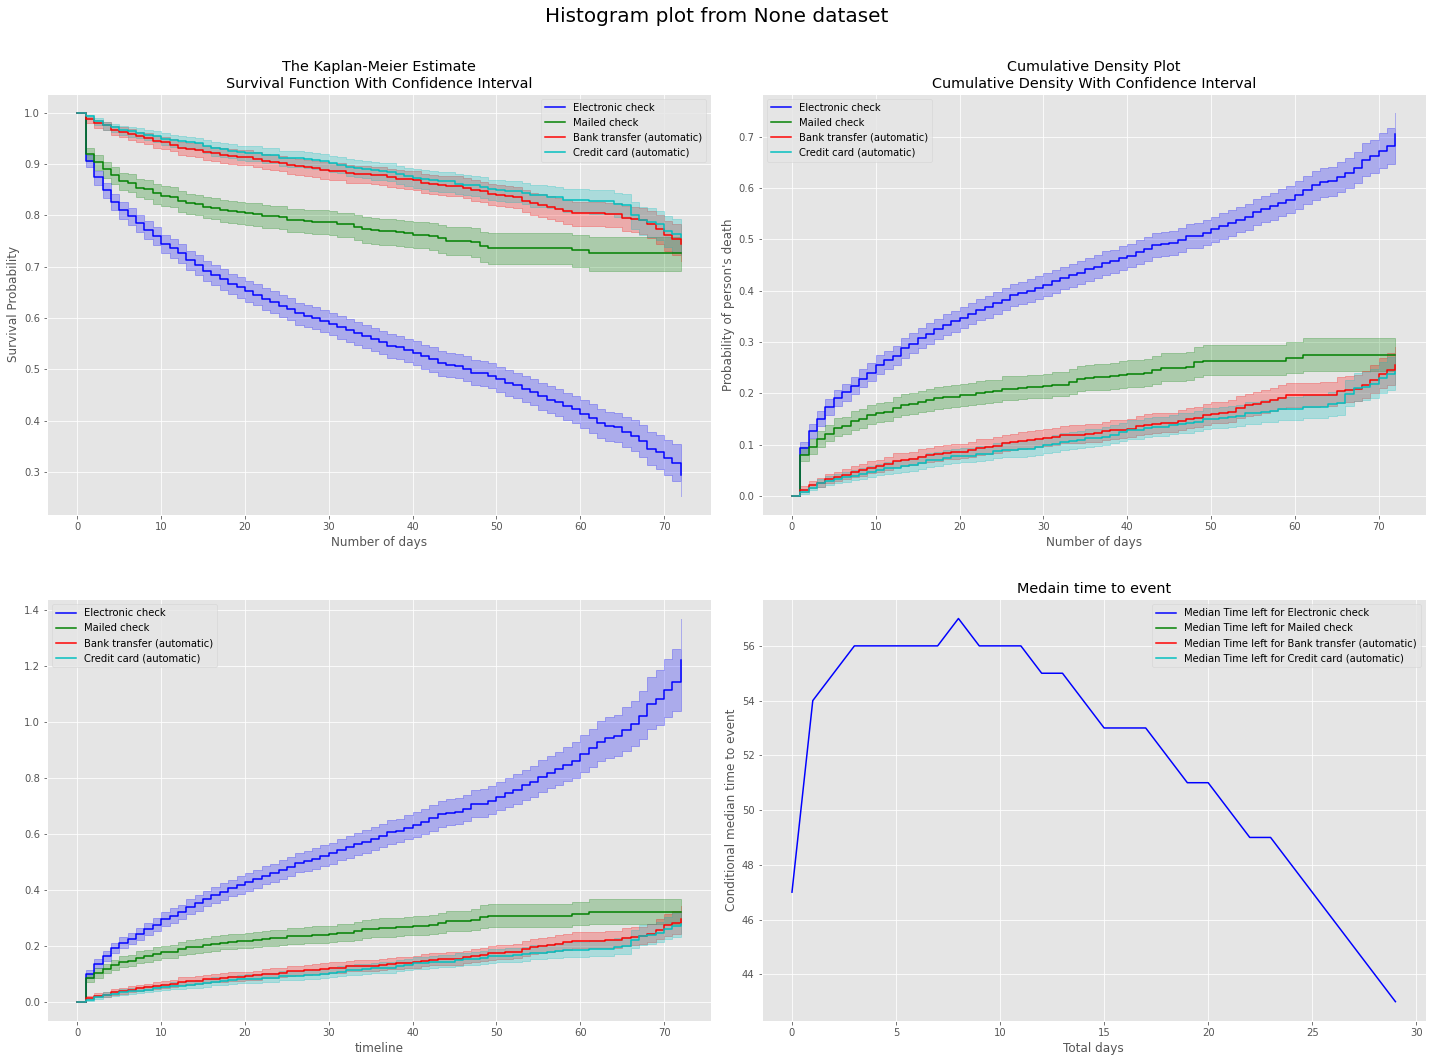

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                                                   test_statistic      p  -log2(p)
Bank transfer (automatic) Credit card (automatic)            0.87   0.35      1.51
                          Electronic check                 510.04 <0.005    372.74
                          Mailed check                      51.07 <0.005     40.03
Credit card (automatic)   Electronic check                 539.74 <0.005    394.21
                          Mailed check                      64.82 <0.005     50.11
Electronic check          Mailed check                     152.46 <0.005    113.93

In [43]:
form,data_list = statistic.survival_analysis_bygroups(df,'tenure','churn',group_col='PaymentMethod',labels=None,title=None,footnote=None)

# Cox-proportional hazard model

The cox-proportional hazard model is a regression model generally used by medical researchers to determine the relationship between the survival time of a subject and one or more predictor variables. In short, we want to find out how different parameters like age, sex, weight, height affects the survival time of a subject.

use the Cox proportional hazards regression analysis, which works for both quantitative predictors non-categorical variables and for categorical variables.

In [111]:
data= data.dropna(subset=['inst', 'time', 'status', 'age', 'sex','ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'])

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2021-11-20 15:14:06 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

              z      p   -log2(p)
covariate                        
age        0.93   0.35       1.51
sex       -2.75   0.01       7.37
ph.ecog    3.29 <0.005       9.95
ph.karno   2.00   0.05       4.45
pat.karno -1.49   0.14       2.87
meal.cal   0.11   0.91       0.13
wt.loss   -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

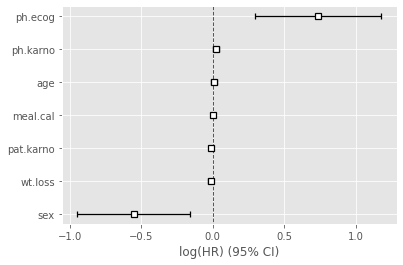

In [170]:
col_list = ['time', 'age', 'sex','ph.ecog','ph.karno','pat.karno','meal.cal','wt.loss','dead']
res = statistic.survival_analysis_coxpro(data,'time','dead',col_list)

In [171]:
res

,covariate,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p),HR detail,Explains
0,age,0.010803,1.010861,0.011600,-0.011933,0.033538,0.988138,1.034107,0.931268,0.351715,1.507521,increase in hazard,no significant difference between different ag...
1,sex,-0.553582,0.574887,0.201584,-0.948680,-0.158484,0.387252,0.853436,-2.746158,0.006030,7.373679,reduction in hazard,being higher value in sex reduces the hazard b...
2,ph.ecog,0.739524,2.094938,0.224987,0.298557,1.180490,1.347912,3.255971,3.286960,0.001013,9.947505,increase in hazard,being higher value in ph.ecog increases the ha...
3,ph.karno,0.022438,1.022691,0.011232,0.000424,0.044452,1.000424,1.045455,1.997701,0.045749,4.450113,increase in hazard,being higher value in ph.karno increases the h...
4,pat.karno,-0.012073,0.987999,0.008116,-0.027981,0.003834,0.972407,1.003842,-1.487559,0.136867,2.869150,reduction in hazard,no significant difference between different pa...
5,meal.cal,0.000028,1.000028,0.000259,-0.000480,0.000537,0.999520,1.000537,0.109237,0.913014,0.131290,increase in hazard,no significant difference between different me...
6,wt.loss,-0.014199,0.985901,0.007766,-0.029421,0.001022,0.971008,1.001023,-1.828308,0.067503,3.888899,reduction in hazard,no significant difference between different wt...


# LOWESS regression

In [17]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/Real estate.csv")

In [22]:
res = statistic.lowess_reg(df,['X3 distance to the nearest MRT station','Y house price of unit area'],0.2,title="")

In [23]:
res

array([[  23.38284   ,   56.89415389],
       [  23.38284   ,   56.89415389],
       [  49.66105   ,   54.94429094],
       [  49.66105   ,   54.94429094],
       [  56.47425   ,   54.42934809],
       [  56.47425   ,   54.42934809],
       [  56.47425   ,   54.42934809],
       [  57.58945   ,   54.34493952],
       [  82.88643   ,   52.43970919],
       [  84.87882   ,   52.29185066],
       [  87.30222   ,   52.112743  ],
       [  90.45606   ,   51.88103964],
       [  90.45606   ,   51.88103964],
       [  90.45606   ,   51.88103964],
       [  90.45606   ,   51.88103964],
       [  90.45606   ,   51.88103964],
       [  90.45606   ,   51.88103964],
       [  90.45606   ,   51.88103964],
       [  90.45606   ,   51.88103964],
       [  90.45606   ,   51.88103964],
       [  90.45606   ,   51.88103964],
       [  90.45606   ,   51.88103964],
       [ 104.8101    ,   50.84645811],
       [ 104.8101    ,   50.84645811],
       [ 104.8101    ,   50.84645811],
       [ 104.8101    ,   

In [24]:
res,res_extra = statistic.lowess_reg(df,
                                     ['X3 distance to the nearest MRT station','Y house price of unit area'],
                                     0.2,title="",xnew = [300, 600])

# Bayesian Averaging

In [34]:
d = {
    'Bar': ['Snickers', 'Mars Bars', 'Milky Way', 'Almond Joy', 'Babe Ruth'],
    'User1': [0.01, 0.25, 0.9, np.nan, 0.5],
    'User2': [np.nan, 0.4, 1.0, np.nan, 0.1],
    'User3': [0.7, 0.1, np.nan, np.nan, 0.3]
}

df = pd.DataFrame(data=d)
df

,Bar,User1,User2,User3
0,Snickers,0.01,NaN,0.7
1,Mars Bars,0.25,0.4,0.1
2,Milky Way,0.90,1.0,NaN
3,Almond Joy,NaN,NaN,NaN
4,Babe Ruth,0.50,0.1,0.3


In [36]:
statistic.avg_bayes(df,['User1','User2','User3'])

,Bar,User1,User2,User3,v,w,R,C,S
0,Snickers,0.01,NaN,0.7,2,0.5,0.355,0.426,0.3905
1,Mars Bars,0.25,0.4,0.1,3,0.6,0.250,0.426,0.3204
2,Milky Way,0.90,1.0,NaN,2,0.5,0.950,0.426,0.6880
3,Almond Joy,NaN,NaN,NaN,0,0.0,NaN,0.426,NaN
4,Babe Ruth,0.50,0.1,0.3,3,0.6,0.300,0.426,0.3504


# Bayesian Averaging 2

In [37]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/rating.csv")

In [45]:
statistic.avg_bayes_2(df,["movieId","rating"],confidence=50,prior=3.25)

,mean,count,bayes,dirichlet
movieId,,,,
1,3.908057,1055,3.878281,0.0
87194,4.166667,3,3.301887,0.0
87197,2.500000,2,3.221154,0.0
87205,3.500000,3,3.264151,0.0
87222,3.473214,56,3.367925,0.0
...,...,...,...,...
6435,3.500000,1,3.254902,0.0
6436,3.625000,16,3.340909,0.0
6437,3.500000,3,3.264151,0.0


# Wilson score

In [51]:
statistic.wilson_score(737, 989, alpha=0.05)

(0.7452, 0.7166, 0.7719)

# distance

## osrm

In [5]:
dist = [[ 1.450185,99.309193],
        [ 1.646177,99.264188]]

In [17]:
distance,duration = statistic.distance(dist[0],dist[1],types="osrm")

In [21]:
distance,duration,geometry = statistic.distance(dist[0],dist[1],types="osrm_path")